In [1]:
import math as m
import numpy as np
from matplotlib import pyplot as plt
from sympy import *

In [87]:
def difference(n1,n2,x0,y0):
    return (y0[n2]-y0[n1])/(x0[n2]-x0[n1])

In [90]:
pi = m.pi
n=6

x0 = np.empty(n)
y0 = np.empty(n)
for i in  range(n-1):
    x0[i] = -4*pi + 2*pi*i
    y0[i] = 0
    
x0[n-1] = 7*pi/2
y0[n-1] = -1.

N = 1000
xp = -4*pi; xk = 4*pi;dx = (xk-xp)/N;
x = np.arange(xp,xk,dx)
y = np.zeros(N)
yn = np.zeros(N)
An = np.zeros((n,n))
Al = np.zeros((n,n))
for i in range(N):
    for j in range(n):
        y[i] += y0[j]*Lagrange(x0, x[i], j)
'''
for i in range(n):
    for j in range(n):
        y[i] = Newton(i,j,x0,y0) * multiply(j,x0,x[i])
        #An[i][j] = tmp
'''        

#a = np.linalg.solve(An,y0)
#for k in a:
#    print(k)
  
#print(max)

'\nfor i in range(n):\n    for j in range(n):\n        y[i] = Newton(i,j,x0,y0) * multiply(j,x0,x[i])\n        #An[i][j] = tmp\n'

In [2]:
# Policzenie wielomianu przy alfa = 1
def fun(x,x0):
    n = len(x0)
    f = 1
    for i in range(n):
        f *= (x-x0[i])
    return f

In [4]:
n = 5
x0 = np.empty(n)
y0 = np.empty(n)
for i in  range(n):
    x0[i] = -4*pi + 2*pi*i
    y0[i] = 0
N = 1000
xp = -4*pi; xk = 4*pi;dx = (xk-xp)/N;
x = np.arange(xp,xk,dx)
y = np.zeros(N)
max = 0
#Znalezienie wartosci najwiekszej wielomianu
for i in range(N):
    y[i] = fun(x[i],x0)
    if abs(y[i])>max:
        max = abs(y[i])
print(1/max)
# Przeskalowanie wielomianu
for i in range(N):
    y[i] /= max

2.8120507906953625e-05


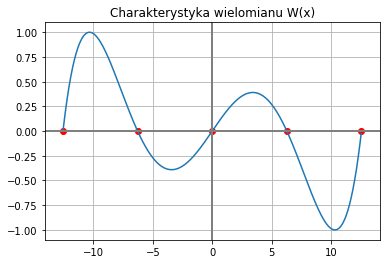

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Charakterystyka wielomianu W(x)')
ax.axhline(linewidth=2, color='gray')
ax.axvline(linewidth=2, color='gray')
ax.grid()
ax.scatter(x0,y0,c='r')
plt.savefig("zad16-b.png")
plt.show()

## całkowanie

In [147]:
#init_printing(use_unicode=False, wrap_line=False)
#k = Symbol('x')
#integrate((k*(k-(pi**2)/4)*(k-(pi**2)/16))**2, k)

In [45]:
diff((k*(k-(3.14**2)/4)*(k-(3.14**2)/16))**2, k)

In [41]:
integrate((k*(k-(pi**2)/4)*(k-(pi**2)/16))*sin(k), k)

In [40]:
integrate((k*(k-(pi**2)/4)*(k-(pi**2)/16))**2, k)

In [47]:
diff((k*(k-(3.14**2)/4)*(k-(3.14**2)/16))*sin(k), k)

In [42]:
expr = sin(k)*sin(k)
#expr
integrate(expr, k)

In [159]:
# Funkcje do wyznacczenia wartosci poszczegolnych calek
def c1(x,dx):
    calka1 = 0
    for i in range(len(x)):
        calka1 +=(x[i]*(x[i]**2-(pi**2)/4)*(x[i]**2-(pi**2)/16))**2*dx
    return calka1

In [160]:
def c2(x,dx):
    calka2 = 0
    for i in range(len(x)):
        calka2 +=(x[i]*(x[i]**2-(pi**2)/4)*(x[i]**2-(pi**2)/16))*m.sin(x[i])*dx
    return calka2

In [173]:
def c3(x,dx):
    calka3 = 0
    for i in range(len(x)):
        calka3 +=m.sin(x[i])**2*dx
    return calka3

-2.518781825396715e-06


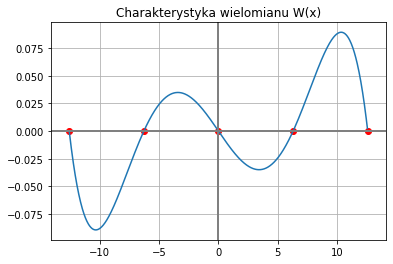

In [191]:
N = 1000
xp = -4*pi; xk = 4*pi;dx = (xk-xp)/N;
x = np.arange(xp,xk,dx)
y = np.zeros(N)
yi = np.zeros(N)
A = np.arange(-0.5,0.5,1/N)
# Wyznaczenie wspolczynnikow rownania kwadratowego
# a*A^2 + b*A + c
a = c1(x,dx)
b = -2*c2(x,dx)
c = c3(x,dx)
# Wyznaczenie minimum
A0 = -b/2/a
print(float(A0))
# Wyznaczenie przebiegu szukanego wielomianu oraz 
# rownania kwadratowego
for i in range(N):
    tmp = fun(x[i],x0)
    y[i] = A0*tmp
    yi[i] = A[i]**2*a + A[i]*b + c
# Narysowanie rozwiazania
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Charakterystyka wielomianu W(x)')
ax.axhline(linewidth=2, color='gray')
ax.axvline(linewidth=2, color='gray')
ax.scatter(x0,y0,c='r')
ax.grid()
plt.savefig("zad16-aw.png")
plt.show()

In [192]:
fig, ax = plt.subplots()
ax.plot(A, yi)
ax.set_title('Rozkład i(alfa)')
ax.axhline(linewidth=2, color='gray')
ax.axvline(linewidth=2, color='gray')
ax.grid()
plt.savefig("zad16-ai.png")
plt.show()

In [121]:
def int_2(x):
    i1 =(6.07573201*x**2*(0.329178442483674*x-0.811391942878007)*(x-0.616225)**2+ 
                  6.07573201*x**2*(0.405695971439004*x-1)**2*(2*x-1.23245)+ 
                  12.15146402*x*(0.405695971439004*x-1)**2*(x - 0.616225)**2)
    i2 =-2*(x*(x-2.4649)*(x-0.616225)*m.cos(x)+x*(x-2.4649)*m.sin(x)+
                 x*(x-0.616225)*m.sin(x)+(x-2.4649)*(x-0.616225)*m.sin(x))
    i3 = x/2 - m.sin(x)*m.cos(x)/2
    return i1,i2,i3

In [ ]:
def find(a,b,c)

In [124]:
N = 1000
xp = -4*pi; xk = 4*pi;dx = (xk-xp)/N;
x = np.arange(xp,xk,dx)
y = np.zeros(N)
yi = np.zeros(N)
A = np.arange(-0.5,0.5,1/N)
index = 0
mini = 1000
for i in range(N):
    #for k in x:
    #    yi[i] += (A[i]*fun(k,x0)-m.sin(k))*(A[i]*fun(k,x0)-m.sin(k))*dx
    yi[i] = integral_1(x[N-1],A[i])-integral_1(x[0],A[i])
    if yi[i]<mini:
        mini = yi[i] 
        index = i
ik = int_2(xk)
ip = int_2(xp)
i1,i2,i3 = (ik[0]-ip[0]),(ik[1]-ip[1]),(ik[2]-ip[2])
A_min = -i2/2/i1
print(A_min)
for i in range(N):
    y[i] = A[index]*fun(x[i],x0) 


0.0010120111174239759


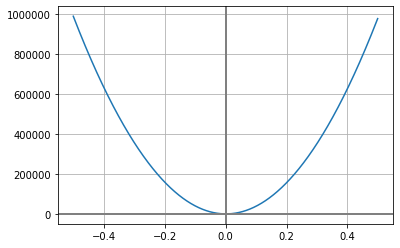

In [118]:
fig, ax = plt.subplots()
ax.plot(A, yi)
ax.axhline(linewidth=2, color='gray')
ax.axvline(linewidth=2, color='gray')
ax.grid()
plt.show()

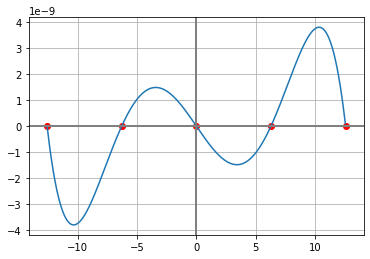

In [104]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.axhline(linewidth=2, color='gray')
ax.axvline(linewidth=2, color='gray')
ax.grid()
ax.scatter(x0,y0,c='r')
plt.savefig("zad16-a.png")
plt.show()